# WeatherPy
----

### Analysis
*The weather becomes warmer as it get closer to 0 latitude, the temperature max at 100(F) and the lowest it gets is at 60(F).
* The latitude doesn't have any affect in the humudiity; it is a widespread and not significant.
* There are some cities with wind in the northern hemispheres; some cities with over 20 to 30 mph of wind.
---
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [75]:
!pip install citipy

## Generate Cities List

In [76]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print 
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [77]:
# OpenWeatherMap API Key
api_key = '7b77e5ef1634a55b7aefa1cd63386f93'

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [78]:
#If a list of dict/series is passed and the keys are all contained in the DataFrame’s index, 
#the order of the columns in the resulting DataFrame will be unchanged.
# is to append those rows to a list and then concatenate the list with the original DataFrame all at once.

city_name = []
country = []
date = []

max_temp = []
wind = []
humidity = []
cloudiness = []

latitude = []
longitude = []


# Start the call counter 
record = 1


#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        wind.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

    # Log file print statement

print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Processing Record 1 | Massakory
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=massakory
Processing Record 2 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=busselton
Processing Record 3 | Upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=upernavik
Processing Record 4 | Kungurtug
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=kungurtug
Processing Record 5 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=bredasdorp
Processing Record 6 | Chicama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=chicama
Processing Record 7 | Sandpoint
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93

Processing Record 57 | Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=hermanus
Processing Record 58 | Eureka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=eureka
Processing Record 59 | Dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=dunedin
Processing Record 60 | Chikhli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=chikhli
Processing Record 61 | Geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=geraldton
Processing Record 62 | Grand-Santi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=grand-santi
Processing Record 63 | Lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=lebu


City not found. Skipping...
Processing Record 113 | Jati
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=jati
Processing Record 114 | Flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=flinders
Processing Record 115 | Batagay-Alyta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=batagay-alyta
Processing Record 116 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=longyearbyen
Processing Record 117 | Roshchino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=roshchino
Processing Record 118 | Mitsamiouli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=mitsamiouli
Processing Record 119 | Baiyin
http://api.openweathermap.org/data/2.5/weather?units=

Processing Record 168 | Kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=kavaratti
Processing Record 169 | Kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=kodiak
Processing Record 170 | Santa Isabel do Rio Negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=santa isabel do rio negro
Processing Record 171 | Harper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=harper
Processing Record 172 | Proletariy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=proletariy
Processing Record 173 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=port elizabeth
Processing Record 174 | Salalah
http://api.openweathermap.org/data/2.5/weather?units=I

Processing Record 223 | Airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=airai
Processing Record 224 | Churapcha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=churapcha
Processing Record 225 | San Alberto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=san alberto
Processing Record 226 | Tautira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=tautira
Processing Record 227 | Batticaloa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=batticaloa
Processing Record 228 | Saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=saldanha
Processing Record 229 | Presidencia Roque Saenz Pena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e

Processing Record 279 | Lahijan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=lahijan
Processing Record 280 | Komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=komsomolskiy
Processing Record 281 | Marsh Harbour
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=marsh harbour
Processing Record 282 | Barra Patuca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=barra patuca
Processing Record 283 | Zyryanka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=zyryanka
Processing Record 284 | Berzasca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=berzasca
Processing Record 285 | Kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef

Processing Record 334 | Sao Filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=sao filipe
City not found. Skipping...
Processing Record 335 | Margherita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=margherita
Processing Record 336 | Sorland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=sorland
Processing Record 337 | Inirida
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=inirida
Processing Record 338 | Honningsvag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=honningsvag
Processing Record 339 | Acapulco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=acapulco
Processing Record 340 | Ponnampet
http://api.openweathermap.org/data/2.5/weather?units=Imper

Processing Record 389 | Miri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=miri
Processing Record 390 | Gibsons
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=gibsons
Processing Record 391 | Anda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=anda
Processing Record 392 | Yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=yulara
Processing Record 393 | Nyurba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=nyurba
City not found. Skipping...
Processing Record 394 | Temerloh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=temerloh
Processing Record 395 | Ambulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386

Processing Record 445 | Riviere-au-Renard
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=riviere-au-renard
Processing Record 446 | Sal Rei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=sal rei
Processing Record 447 | Pulandian
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=pulandian
Processing Record 448 | Talcahuano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=talcahuano
Processing Record 449 | Guacheta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=guacheta
Processing Record 450 | Egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=egvekinot
Processing Record 451 | Mutare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5e

Processing Record 500 | Mineros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=mineros
Processing Record 501 | Cam Ranh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=cam ranh
Processing Record 502 | Itupiranga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=itupiranga
Processing Record 503 | Gorontalo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=gorontalo
Processing Record 504 | Aranos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=aranos
Processing Record 505 | Manicore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&q=manicore
Processing Record 506 | Tezu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b77e5ef1634a55b7aefa1cd63386f93&

In [79]:
# Create a dictonary lists 
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Latitude":latitude, 
    "Longitute":longitude, 
    "Max Temp": max_temp,
    "Wind Speed":wind
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count 
weather_data.count()

City          530
Cloudiness    530
Country       530
Date          530
Humidity      530
Latitude      530
Longitute     530
Max Temp      530
Wind Speed    530
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [80]:
# Export the city data into a .csv.
weather_data.to_csv("Weather_Data.csv", index=False)

# Display the DataFrame
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitute,Max Temp,Wind Speed
0,Massakory,0,TD,1553634778,19,13.00,15.73,81.21,13.00
1,Busselton,0,AU,1553634620,46,-33.64,115.35,55.00,14.67
2,Upernavik,32,GL,1553634780,100,72.79,-56.15,6.15,4.94
3,Kungurtug,0,RU,1553634782,58,50.60,97.53,-2.77,2.93
4,Bredasdorp,76,ZA,1553634017,68,-34.53,20.04,64.40,10.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

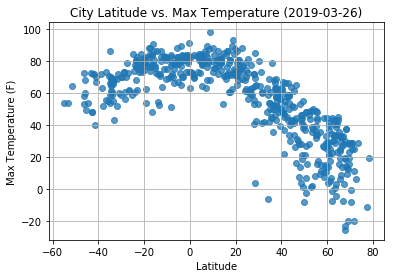

In [96]:
# Plot time
plt.scatter(weather_data["Latitude"],weather_data["Max Temp"], marker="o", alpha = 0.75)

date =datetime.datetime.fromtimestamp(int(weather_data["Date"][0])).strftime('%Y-%m-%d')

plt.title("City Latitude vs. Max Temperature (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save figure
plt.savefig("plot.png")

# Plot
plt.show()

#### Latitude vs. Humidity Plot

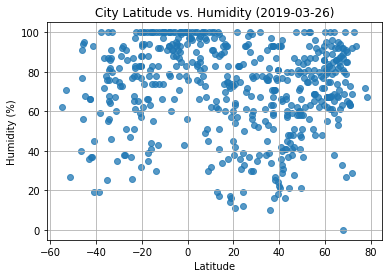

In [97]:
# Plot time
plt.scatter(weather_data["Latitude"],weather_data["Humidity"], marker="o", alpha = 0.75)

plt.title("City Latitude vs. Humidity (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save figure
plt.savefig("plot.png")

# Plot
plt.show()

#### Latitude vs. Cloudiness Plot

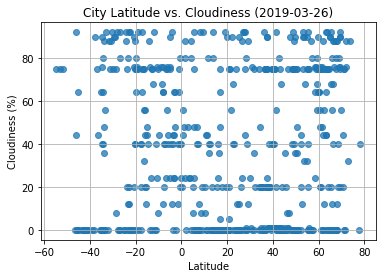

In [98]:
# Plot time
plt.scatter(weather_data["Latitude"],weather_data["Cloudiness"], marker="o", alpha = 0.75)


plt.title("City Latitude vs. Cloudiness (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save figure
plt.savefig("plot.png")

# Plot
plt.show()

#### Latitude vs. Wind Speed Plot

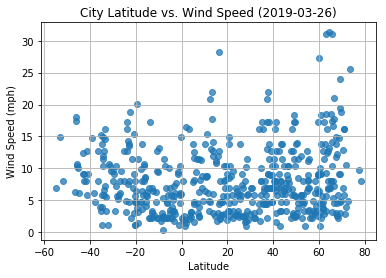

In [94]:
# Plot time
plt.scatter(weather_data["Latitude"],weather_data["Wind Speed"], marker="o", alpha = 0.75)

plt.title("City Latitude vs. Wind Speed (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Plot
plt.show()